In [1]:
#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

normalisation

In [4]:
import sys
sys.path.append("/Users/zico5288/Desktop/INFR10069-2020-CW2-main/helpers")
from iaml01cw2_helpers import load_FashionMNIST
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("/Users/zico5288/Desktop/INFR10069-2020-CW2-main/data/fashion")
import copy
Xtrn_orig = copy.deepcopy(Xtrn)
Xtst_orig = copy.deepcopy(Xtst)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import *
from sklearn.svm import SVC
from matplotlib.pyplot import MultipleLocator
Xtrn = Xtrn_orig/255
Xtst = Xtst_orig/255
Xmean = np.mean(Xtrn, axis = 0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

Q1.1

In [3]:
# Q1.1
def iaml01cw2_q1_1():
    print('First 4 elements of training sample:', Xtrn_nm[0, :4])
    print('Last 4 elements of training sample:', Xtrn_nm[-1, :4])
iaml01cw2_q1_1()

First 4 elements of training sample: [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
Last 4 elements of training sample: [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


Q1.2

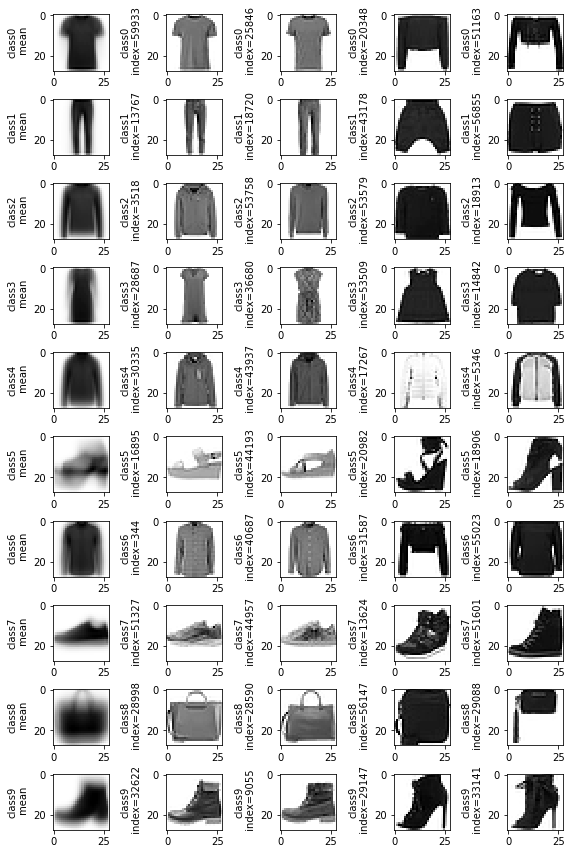

In [4]:
# Q1.2
def iaml01cw2_q1_2():
    fig, ax = plt.subplots(10, 5, figsize=(10, 15), gridspec_kw=dict(hspace=0.5, wspace=0.1))
    for i in range(10):
        index = np.argwhere(Ytrn == i)
        Xtrn_i = np.array(Xtrn[Ytrn == i])
        Xtrn_i_mean = np.mean(Xtrn_i, axis = 0)
        dist = np.array([np.sqrt(np.sum(np.square(i - Xtrn_i_mean))) for i in Xtrn_i])
        Xtrn_i_mean = np.mean(Xtrn_i, axis = 0)

        Xtrn_i_cloest_1_index = np.argmin(dist)
        Xtrn_i_cloest_1 = Xtrn_i[Xtrn_i_cloest_1_index]

        dist0_ = dist
        dist0_[np.argmin(dist0_)] = np.max(dist)
        Xtrn_i_cloest_2_index = np.argmin(dist0_)
        Xtrn_i_cloest_2 = Xtrn_i[Xtrn_i_cloest_2_index]

        dist = np.array([np.sqrt(np.sum(np.square(i - Xtrn_i_mean))) for i in Xtrn_i])
        Xtrn_i_furthest_1_index = np.argmax(dist)
        Xtrn_i_furthest_1 = Xtrn_i[Xtrn_i_furthest_1_index]

        dist1_ = dist
        dist1_[np.argmax(dist1_)] = np.min(dist)
        Xtrn_i_furthest_2_index = np.argmax(dist1_)
        Xtrn_i_furthest_2 = Xtrn_i[Xtrn_i_furthest_2_index]

        ax[i,0].imshow(Xtrn_i_mean.reshape(28,28),'gray_r')
        ax[i,0].set_ylabel('class%s\n mean'%i) 
        ax[i,1].imshow(Xtrn_i_cloest_1.reshape(28,28),'gray_r')
        ax[i,1].set_ylabel('class%s\n index=%s'%(i,index[Xtrn_i_cloest_1_index][0]))
        ax[i,2].imshow(Xtrn_i_cloest_2.reshape(28,28),'gray_r')
        ax[i,2].set_ylabel('class%s\n index=%s'%(i,index[Xtrn_i_cloest_2_index][0]))
        ax[i,3].imshow(Xtrn_i_furthest_2.reshape(28,28),'gray_r')
        ax[i,3].set_ylabel('class%s\n index=%s'%(i,index[Xtrn_i_furthest_2_index][0]))
        ax[i,4].imshow(Xtrn_i_furthest_1.reshape(28,28),'gray_r')
        ax[i,4].set_ylabel('class%s\n index=%s'%(i,index[Xtrn_i_furthest_1_index][0]))
    plt.savefig('1.2.pdf')
iaml01cw2_q1_2()

Q1.3

In [5]:
# Q1.3
def iaml01cw2_q1_3():
    pca = PCA()
    pca.fit(Xtrn_nm)
    explained_variance = pca.explained_variance_
    print('explained variance (1-5): ', explained_variance[:5])
iaml01cw2_q1_3()

explained variance (1-5):  [19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


Q1.4

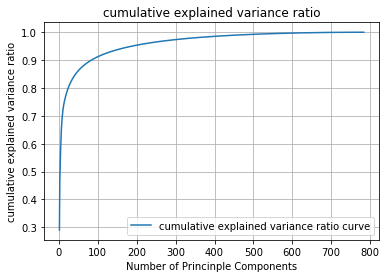

In [6]:
# Q1.4
def iaml01cw2_q1_4():
    pca = PCA()
    pca.fit(Xtrn_nm)
    c = 0
    y = list()
    x = list(range(1,785))
    plt.title('cumulative explained variance ratio')
    plt.xlabel('Number of Princinple Components')
    plt.ylabel('cumulative explained variance ratio')
    for i in range(784):
        c = c + pca.explained_variance_ratio_[i]
        y.append(c)
    plt.plot(x,y,label = 'cumulative explained variance ratio curve')
    plt.grid()
    plt.legend()
    plt.savefig('1.4.pdf')
iaml01cw2_q1_4()

Q1.5

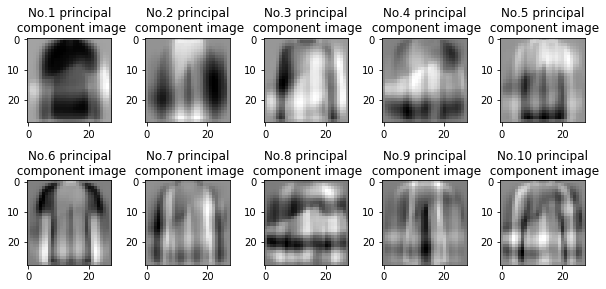

In [5]:
# Q1.5
def iaml01cw2_q1_5():
    plt.figure(figsize=(10,5))
    pca = PCA(n_components=10)
    pca.fit(Xtrn_nm)
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        ax.set_title('No.%s principal\n component image'%(i+1))
        plt.imshow(pca.components_[i].reshape(28,28),'gray_r')
        plt.subplots_adjust(hspace=0.1, wspace=0.4)
    plt.savefig('1.5.pdf')
iaml01cw2_q1_5()

Q1.6

In [8]:
# Q1.6
def iaml01cw2_q1_6():
    for j in [5,20,50,200]:
        pca = PCA(n_components=j,random_state = 1)
        pca.fit(Xtrn_nm)
        for i in range(10):
            Xtrn_i = np.array(Xtrn_nm[Ytrn == i])
            X_pca = pca.transform(Xtrn_i)
            X_recon = pca.inverse_transform(X_pca[0])
            RMSE = np.sqrt(np.mean((X_recon - Xtrn_i[0])**2))
            print('K = %s, Class = %s, RMSE = %s'%(j,i,RMSE))
iaml01cw2_q1_6()

K = 5, Class = 0, RMSE = 0.2561486638821891
K = 5, Class = 1, RMSE = 0.19802439610928813
K = 5, Class = 2, RMSE = 0.19870015563231883
K = 5, Class = 3, RMSE = 0.14565797934152952
K = 5, Class = 4, RMSE = 0.11820870306754985
K = 5, Class = 5, RMSE = 0.1811297615433225
K = 5, Class = 6, RMSE = 0.1294792775623764
K = 5, Class = 7, RMSE = 0.16562538305229438
K = 5, Class = 8, RMSE = 0.22339658761007575
K = 5, Class = 9, RMSE = 0.1835104209079604
K = 20, Class = 0, RMSE = 0.14994362224511565
K = 20, Class = 1, RMSE = 0.14049830725371512
K = 20, Class = 2, RMSE = 0.14560485304923462
K = 20, Class = 3, RMSE = 0.10727048471559786
K = 20, Class = 4, RMSE = 0.10267068061441675
K = 20, Class = 5, RMSE = 0.1585940819038629
K = 20, Class = 6, RMSE = 0.0959006721009286
K = 20, Class = 7, RMSE = 0.12783357956919997
K = 20, Class = 8, RMSE = 0.14493295953684843
K = 20, Class = 9, RMSE = 0.15105775661805776
K = 50, Class = 0, RMSE = 0.1271691531790629
K = 50, Class = 1, RMSE = 0.09491171101685138
K = 5

Q1.7

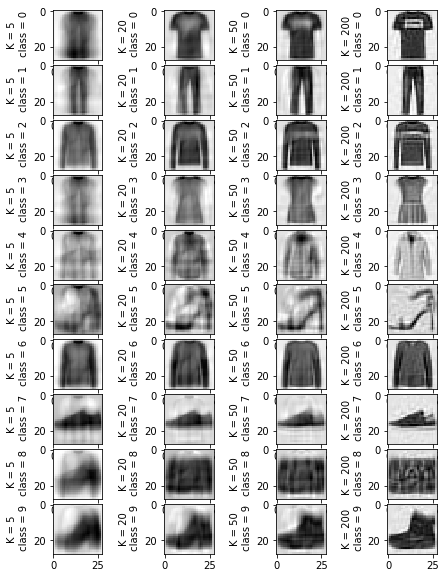

In [9]:
# Q1.7
def iaml01cw2_q1_7():
    fig, ax = plt.subplots(10, 4, figsize=(7, 10), gridspec_kw=dict(hspace=0.1, wspace=1))
    for i in range(10):
        Xtrn_i = np.array(Xtrn_nm[Ytrn == i])
        for j in range(4):
            a = [5,20,50,200]
            pca = PCA(n_components=a[j])
            pca.fit(Xtrn)
            X_pca = pca.transform(Xtrn_i)
            X_recon = pca.inverse_transform(X_pca[0]) + np.mean(Xtrn, axis = 0)
            ax[i,j].imshow(X_recon.reshape(28,28),'gray_r')
            ax[i,j].set_ylabel('K = %s\n class = %s'%(a[j],i),size = 10)
    plt.savefig('1.7.pdf')
iaml01cw2_q1_7()

Q1.8

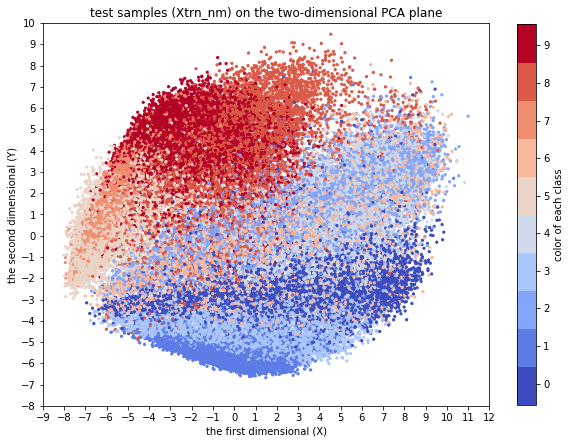

In [11]:
# Q1.8
def iaml01cw2_q1_8():
    plt.figure(figsize=(10,10))
    pca = PCA(n_components=2)
    pca.fit(Xtrn_nm)
    XY = pca.transform(Xtrn_nm)
    plt.scatter(XY[:,0],XY[:,1],c=Ytrn,s=5.,cmap = plt.cm.get_cmap('coolwarm',10))
    cb = plt.colorbar(shrink=0.7)
    cb.set_ticks(np.linspace(0.5,8.5,10))
    cb.set_ticklabels(np.arange(0,10))
    cb.set_label('color of each class')
    plt.title('test samples (Xtrn_nm) on the two-dimensional PCA plane')
    plt.xlabel('the first dimensional (X)')
    plt.ylabel('the second dimensional (Y)')
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax1=plt.gca()
    ax1.xaxis.set_major_locator(x_major_locator)
    ax1.yaxis.set_major_locator(y_major_locator)
    plt.xlim((-9,12))
    plt.ylim((-8,10))
    plt.axes().set_aspect('equal')
    plt.savefig('1.8.pdf')
iaml01cw2_q1_8()